<a href="https://colab.research.google.com/github/zerlin0/pcvk/blob/main/finalproject_pcvkzerlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zerlina Putri Wollwage (2141720146)**

*Final Project Image Processing KTM*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
import io
import time
%matplotlib inline
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

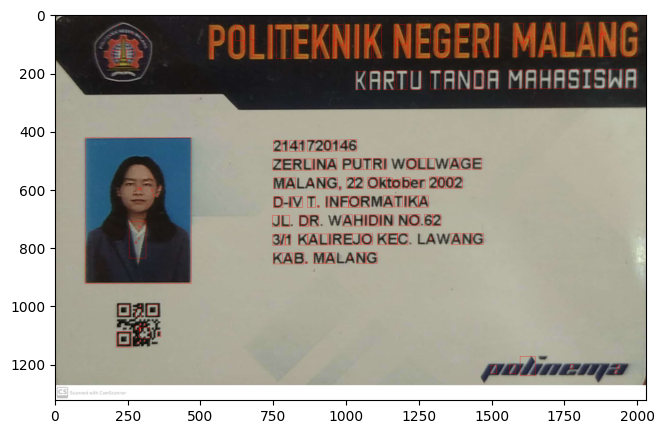

In [3]:
import cv2

# Load the input image
ktm = cv2.imread('/content/drive/MyDrive/Zerlina_KTM.jpg')

#filter the image (GaussianBlur, grayscale, threshold, Otsu)
blurred = cv2.GaussianBlur(ktm, (5, 5), 0.5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi contours
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

#result
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB))

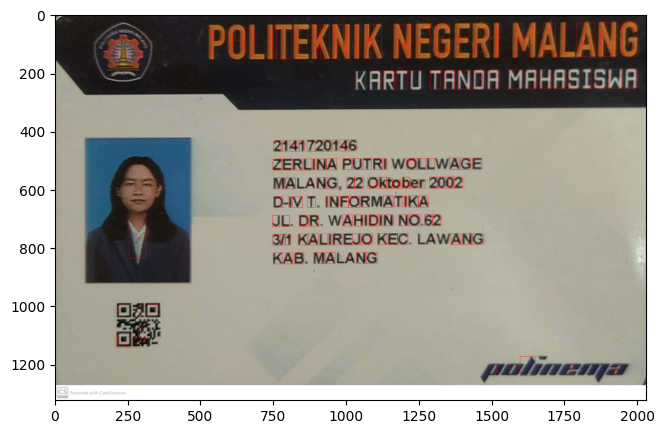

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
ktm = cv2.imread('/content/drive/MyDrive/Zerlina_KTM.jpg')

# Filter the image (grayscale, GaussianBlur, thresholding, Erode )
gray = cv2.cvtColor(ktm, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0.5)
ret, bw = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw, cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Extract contours
contours, hierarchy = cv2.findContours(erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Loop through contours to identify characters
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB))
plt.show()

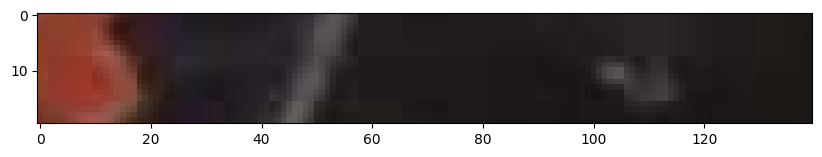

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
ktm = cv2.imread('/content/drive/MyDrive/Zerlina_KTM.jpg')

# Filter the image (grayscale, GaussianBlur, thresholding, Erode )
blurred = cv2.GaussianBlur(ktm, (3, 3), 0.3)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktm, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktm[160:180, 270:410]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

In [ ]:
# Mengimpor library yang diperlukan
import os
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Memuat dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Menentukan jumlah sampel per kelas
num_samples_per_class = 100

# Menentukan digit yang akan diekstrak
digits_to_extract = list(range(10))

# Fungsi untuk mengekstrak sampel dari dataset
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Mengekstrak sampel dari dataset pelatihan
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Mengacak urutan data pelatihan
np.random.shuffle(training_data)

# Memisahkan fitur dan label
X, Y = zip(*training_data)

# Mengubah bentuk fitur menjadi (-1, 28, 28, 1)
X = np.array(X).reshape(-1, 28, 28, 1)

# Menyimpan fitur ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Menyimpan label ke file pickle dalam bentuk one-hot encoding
pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Mengimpor library yang diperlukan
from keras.models import load_model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
X_train = pickle.load(open("X_mnist.pickle", "rb"))
Y_train = pickle.load(open("Y_mnist.pickle", "rb"))

# Normalisasi fitur dengan membaginya dengan 255
X_train = X_train.astype('float32') / 255

# Fungsi untuk membuat model
def create_model():
    model = Sequential()
    # Menambahkan layer ZeroPadding2D
    model.add(ZeroPadding2D((1, 1), input_shape=(28, 28, 1)))
    # Menambahkan layer Conv2D dengan 64 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Conv2D dengan 128 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Flatten untuk meratakan output sebelum memasukkannya ke layer Dense
    model.add(Flatten())
    # Menambahkan layer Dense dengan 128 neuron dan fungsi aktivasi ReLU
    model.add(Dense(128, activation='relu'))
    # Menambahkan layer Dense dengan 10 neuron (untuk 10 kelas) dan fungsi aktivasi softmax
    model.add(Dense(10, activation='softmax'))
    return model

# Membuat model
model = create_model()

# Mengompilasi model dengan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan
model.fit(X_train, Y_train, epochs=10, batch_size=128)

# Menyimpan model ke file 'mnist_model.h5'
model.save('mnist_model.h5')

Epoch 1/10
8/8 [==============================] - 5s 66ms/step - loss: 1.9839 - accuracy: 0.3760
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8900 - accuracy: 0.7530
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4801 - accuracy: 0.8380
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3320 - accuracy: 0.8990
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2470 - accuracy: 0.9280
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1770 - accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1282 - accuracy: 0.9620
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0964 - accuracy: 0.9740
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0828 - accuracy: 0.9800
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0491 - accuracy: 0.9880


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9920
Accuracy on the test set: 99.20%


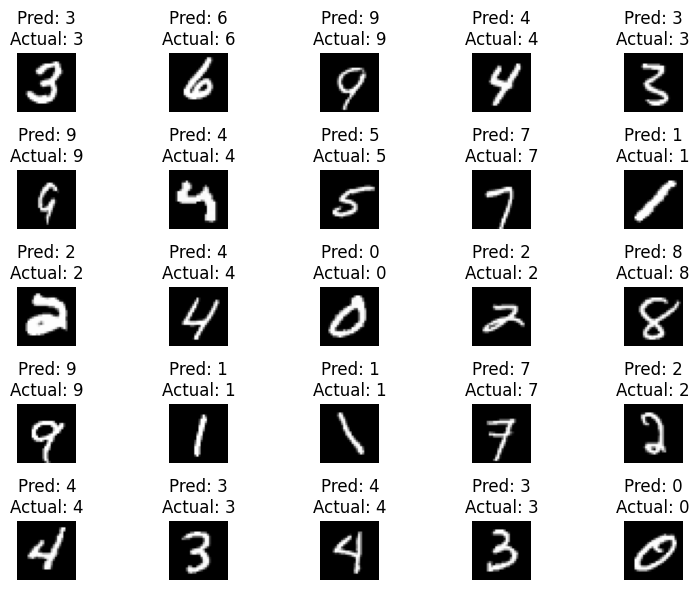

In [ ]:
# Mengimpor library yang diperlukan
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi fitur dengan membaginya dengan 255
X_test = X_test / 255.0

# Memuat model yang telah dilatih sebelumnya
model = tf.keras.models.load_model("mnist_model.h5")

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Menghitung akurasi model pada data uji
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Menampilkan hasil prediksi pada beberapa sampel data uji
num_results_to_display = 25
fig, axes = plt.subplots(5, 5, figsize=(8, 6))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])
    img = X_test[i].reshape((28, 28))
    axes[i // 5, i % 5].imshow(img, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#check the path
from google.colab import drive
drive.mount('/content/drive')
import os

ktm = '/content/drive/MyDrive/Zerlina_KTM.jpg'

# Check if the file exists
if os.path.exists(ktm):
    print("Image exists.")
else:
    print("Image not found. Check the file path.")


Mounted at /content/drive
Image exists.


In [ ]:
# Install Tesseract OCR and pytesseract
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


***FINAL RESULT***

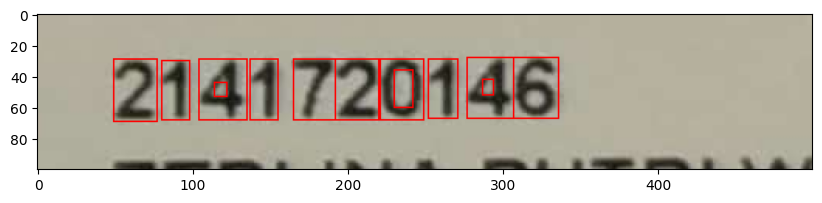

NIM: ['4', '1', '0', '', '2', '7', '4', '4', '', '2', '6', '4', '']


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import re

# Load the input image
ktm = cv2.imread('/content/drive/MyDrive/Zerlina_KTM.jpg')

# Define the region to be cropped
cropped_img = ktm[400:500, 700:1200]

# Convert the cropped image to grayscale
gray_cropped = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur for smoothing
blurred_cropped = cv2.GaussianBlur(gray_cropped, (5, 5), 0.5)

# Apply binary thresholding to the cropped image
ret_cropped, bw_cropped = cv2.threshold(blurred_cropped, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Extract contours from the cropped image
contours_cropped, hierarchy_cropped = cv2.findContours(bw_cropped, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Initialize a list to store the text from the cropped region
cropped_text = []

# Loop through contours to identify characters in the cropped region
for cnt in contours_cropped:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')

    if h >= 4 and w >= 1 and float(ras) <= 1:
        # Extract the region of interest (ROI) for each contour in the cropped region
        roi_cropped = cropped_img[y:y+h, x:x+w]

        # Convert the ROI to grayscale
        roi_gray_cropped = cv2.cvtColor(roi_cropped, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding to the ROI in the cropped region
        ret_roi_cropped, roi_bw_cropped = cv2.threshold(roi_gray_cropped, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Use Tesseract OCR to extract text from the ROI in the cropped region
        text_cropped = pytesseract.image_to_string(Image.fromarray(roi_bw_cropped), config='--psm 6')

        # Clean the text using regular expressions
        clean_text_cropped = re.sub(r'[^a-zA-Z0-9]', '', text_cropped)

        # Append the cleaned text to the list for the cropped region
        cropped_text.append(clean_text_cropped)

        # Draw rectangles on the identified characters in the cropped region
        cv2.rectangle(cropped_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display the result for the cropped region
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()

# Print the extracted and cleaned text from the cropped region
print("NIM:", cropped_text)
